# Intégration numérique

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Programmation des 3 méthodes classiques : point milieu, trapèzes, Simpson

Soient $a$ et $b$ deux réels tels que $a < b$ et $f$ une fonction continue sur $[a,b]$.

Dans cette section , on cherche à comparer les 3 méthodes classiques d'intégration numérique décrites en cours pour approcher
$$
I(f,a,b) := \int_a^b f(x) dx.
$$

Pour ce faire, on considère une subdivision $a = a_0 < a_1 < ... < a_n = b$ de $[a,b]$ avec 
$a_i = a+ih$ et $h = \dfrac{b-a}{n}$.

## 1 - Méthode du point milieu

On rappelle que la formule du point milieu composite pour approcher $I(f,a,b)$ est donnée par
$$
J_m^c(f,a,b,n) = \dfrac{b-a}{n} \sum_{j = 0}^{n-1} f\left(\dfrac{a_j+a_{j+1}}{2}\right).
$$

Écrire une fonction **mil** qui, pour les entrées $f$ (la fonction à intégrer), $a$, $b$ (les bornes de l'intégrale) et $n$ (le nombre de sous-intervalles), retourne la valeur de $J_m^c(f,a,b,n)$ rappelée ci-dessus.

On testera cette fonction pour approcher l'intégrale $\int_0^1 e^x dx$ dont on connaît la valeur $I_e$.

In [5]:
def mil(f,a,b,n):
    somme = 0
    pas = (b-a)/n
    for j in range(n):
        a0 = a+j*pas
        a1 = a+(j+1)*pas
        somme = somme + f((a0+a1)/2)
    somme = pas*somme
    return somme

In [8]:
mil(exp,0,1,20)

1.7181028538189065

Dans cette question, on travaille avec la fonction $f = exp$, $a = 0$ et $b = 1$.

Écrire les commandes nécessaires au tracé de l'évolution de l'erreur $$E_m(n) := \Big|J_m^c(exp,0,1,n)-I_e\Big|$$ en fonction de $n$. On fera varier $n$ de $1$ à $1000$.

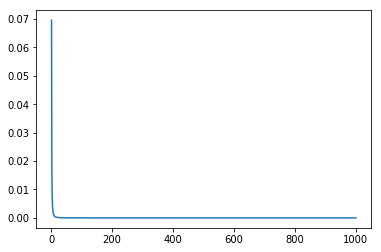

In [11]:
def erreur_exp_milieu(n):
    erreur = abs(mil(exp,0,1,n)-(exp(1)-1)) #la valeur exacte de l'intégrale est donnée par exp(1)-exp(0)=exp(1)-1
    return erreur

entiers = []
erreurs = []

for n in range(1,1000+1):
    entiers.append(n)
    erreurs.append(erreur_exp_milieu(n))
    
plot(entiers,erreurs)

Reprendre la question précedente et faire le tracé en échelle logarithmique (commande *loglog*).

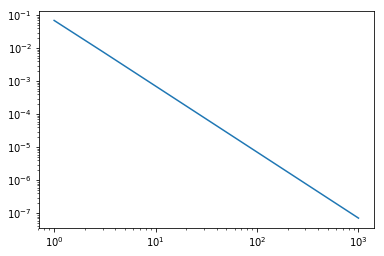

In [13]:
loglog(entiers,erreurs) #commande équivalente à plot(log(entiers),log(erreurs))

Quel est le comportement de l'erreur $E_m(n)$ ?

Pour répondre à cette question, on pourra utiliser les notions suivantes : 

+ Si $E(n)$, $C$ et $\alpha$ sont des quantités positives, on a 
$$
E(n) \sim \dfrac{C}{n^\alpha} 
\Longleftrightarrow 
\log\Big(E(n)\Big) \sim \log(C)-\alpha \log(n).
$$

+ En conséquence, si le tracé de $\log\Big(E(n)\Big)$ en fonction de $\log(n)$ est une droite, la pente de cette dernière donne $-\alpha$.

+ On rappelle que si $E(n) \sim\dfrac{C}{n^\alpha}$, on dit que $E(n)$ est de l'ordre de  $\dfrac{1}{n^\alpha}.$

In [14]:
log_entiers = log(entiers)
log_erreurs = log(erreurs)

(log_erreurs[-1]-log_erreurs[0])/(log_entiers[-1]-log_entiers[0])

#On trouve que le alpha rechrché vaut environ 2.

-1.9958266371502156

## 2 - Méthode des trapèzes

On rappelle que la formule des trapèzes composite pour approcher $I(f,a,b)$ est donnée par
$$
J_t^c(f,a,b,n) = \dfrac{b-a}{2n} \left( f(a) + f(b) + 2\sum_{j = 1}^{n-1} f(a_j) \right).
$$

Écrire une fonction **trap** qui, pour les entrées $f$, $a$, $b$ et $n$, retourne la valeur de $J_t^c(f,a,b,n)$ rappelée ci-dessus.

On testera cette fonction pour approcher l'intégrale $\int_0^1 e^x dx$ dont on connaît la valeur $I_e$.

In [ ]:
def mil(f,a,b,n):
    somme = 0
    pas = (b-a)/n
    for j in range(n):
        ... #à compléter
    return somme

Dans cette question, on travaille avec la fonction $f = exp$, $a = 0$ et $b = 1$.

Écrire les commandes nécessaires au tracé, en échelle logarithmique, de l'évolution de l'erreur $$E_t(n) := \Big|J_t^c(exp,0,1,n)-I_e\Big|$$ en fonction de $n$. On fera varier $n$ de $1$ à $1000$.

Quel est le comportement de l'erreur $E_t(n)$ ?

## 3 - Méthode de Simpson

On rappelle que la formule de Simpson composite pour approcher $I(f,a,b)$ est donnée par
$$
\begin{array}{rcl}
J_s^c(f,a,b,n) & = 
& \dfrac{b-a}{6n} \left( f(a) + f(b) + 2\sum_{j = 1}^{n-1} f(a_j) 
+ 4 \sum_{j = 0}^{n-1} f\left(\dfrac{a_j+a_{j+1}}{2}\right)
\right) 
\\
& = 
& \dfrac{1}{3} J_t^c(f,a,b,n) + \dfrac{2}{3} J_m^c(f,a,b,n).
\end{array}
$$

Écrire une fonction **simp** qui, pour les entrées $f$, $a$, $b$ et $n$, retourne la valeur $J_s^c(f,a,b,n)$ rappelée ci-dessus.

On testera cette fonction pour approcher l'intégrale $\int_0^1 e^x dx$ dont on connaît la valeur $I_e$.

Dans cette question, on travaille avec la fonction $f = exp$, $a = 0$ et $b = 1$.

Écrire les commandes nécessaires au tracé, en échelle logarithmique, de l'évolution de l'erreur $$E_s(n) := \Big|J_s^c(exp,0,1,n)-I_e\Big|$$ en fonction de $n$. On fera varier $n$ de $1$ à $1000$.

Quel est le comportement de l'erreur $E_s(n)$ ?

## 4 - Bilan

Tracé sur le même graphe, l'évolution de $E_m(n)$ (en vert), $E_t(n)$ (en noir) et $E_s(n)$ (en rouge) en fonction de $n$, en échelle logarithmique, avec des couleurs différentes et une légende.

# Calcul d'un signal moyen

On suppose qu'on dispose du signal bleu $s$ tracé ci-dessous en fonction du temps $t$. 

In [ ]:
n = 2000
t_echant = sort(random.uniform(0,10,size=n))
mumax = 10
mu = random.uniform(0,mumax,size=1)
ecarttype = random.uniform(0,mu*0.1,size=1)
#s_echant = sin(2*t_echant)+numpy.random.normal(mu,ecarttype,size=n)
s_echant = random.normal(mu,ecarttype,size=n)

figure(100)
plot(t_echant,s_echant)
print("mu = ",mu)

La question est de calculer la valeur moyenne de ce signal au cours du temps, afin d'en avoir une vision résumée, quitte à perdre un peu d'information.

Plus précisément, on cherche à tracer en fonction du temps $t$ 
$$
s_{moy}(t) := \dfrac{1}{t} \int_{t_0}^t s(u) du.
$$

Comme l'expression analytique du signal bleu $s$ n'est pas connue, on doit approcher l'intégrale à l'aide des valeurs dont on dispose dans les tableaux $t_{echant}$ et $s_{echant}$.

Tracer sur le même graphe 
+ le signal $s$ en bleu,
+ et sa valeur moyenne calculée par la méthode des trapèzes en rouge.

# Approximation de l'aire d'une surface

Effectuer, puis analyser le code suivant pour comprendre ce qu'il fait.

In [ ]:
def echant(numfig,n):
    x = linspace(-1,1);
    y = 1+x**2;
    figure(numfig)
    plot(x,y);
    plot(x,-y);
    x = linspace(1,3+2*sqrt(2));
    y = 4-(x-3)**2/2;
    plot(x,y);
    plot(x,-y);
    
    print("\n\n\nCliquer sur la partie haute de la figure pour représenter la frontière avec " + repr(n) + " points\n\n\n")
    pts = array(ginput(n))
    xx = pts[:,0]
    yy = pts[:,1]
    plot(xx,yy,'ok')
    i = argsort(xx)    
    return xx[i],yy[i]

xx,yy = echant(1000,10)
print("xx = ",xx)
print("yy = ",yy)

En utilisant la fonction echant ci-dessus, créer une fonction **airet** qui, 
+ calcule l'aire approchée $J_n$ du poisson en utilisant les $n$ points échantillonés et la formule des trapèzes composite 
+ et retourne l'erreur relative (en pourcentage) entre l'aire exacte et $J_n$.

On admettra que l'aire du poisson vaut $I = \dfrac{8}{3} (7+4\sqrt{2})$.

Faire varier le nombre de points échantillonnés sur la courbe et observer l'évolution de l'erreur.